## Unsupervised Machine Learning
### Author:Divya Bharti
### GRIP-The Spark Foundation
### Data Science Internship
### BATCH: DECEMBER 2020
### Task-2
### Problem Statement:From the ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [5]:
#IMPORTING ALL REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [39]:
#TO READ THE DATA
Iris_Dataset=pd.read_csv("Iris.csv")
Iris_Dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Data Imported Successfully

In [40]:
#TO GET FIRST FIVE ROWS FROM DATASET
Iris_Dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


First five rows of dataset

In [28]:
#TO CHECK HOW MANY ROWS AND COLUMNS IN DATA
Iris_Dataset.shape


(150, 6)

As,we can see that there is 150 rows and 6 columns in dataset

In [42]:
#TO CHECK NULL VALUES IN DATA
Iris_Dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

From the above calculation ,we can see that there is no null value in data

In [43]:
#TO CHECK ANY DUPLICATE VALUES IN DATA
Iris_Dataset.duplicated().sum()

0

In [21]:
#TO GET ALL COLUMNS NAMES AVAILABLE IN DATASET
Iris_Dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [58]:
#TO CHECK HOW MANY EXAMPLES WE HAVE OF EACH SPECIES    
Iris_Dataset["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [47]:
#REINDEX THE DATASET(AS WE DON'T WANT ID  COLUMNS)
Iris_Dataset.drop(["Id"],axis=1,inplace=True)
Iris_Dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
#TO GET STATISCAL SUMMARY OF DATA
Iris_Dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### VISUALISATION:

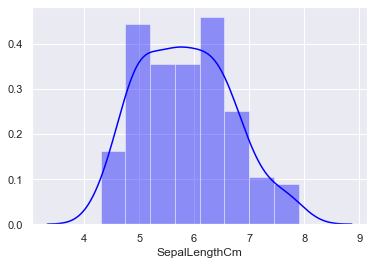

In [27]:
#TO CHECK THE VARIATIONS IN DATA DISTRIBUTION
sns.distplot(Iris_Dataset["SepalLengthCm"],color="blue")
sns.set(rc={'figure.figsize':(7,5)})

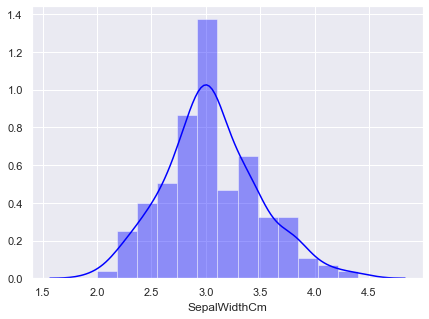

In [28]:
sns.distplot(Iris_Dataset["SepalWidthCm"],color="blue")
sns.set(rc={'figure.figsize':(7,5)})

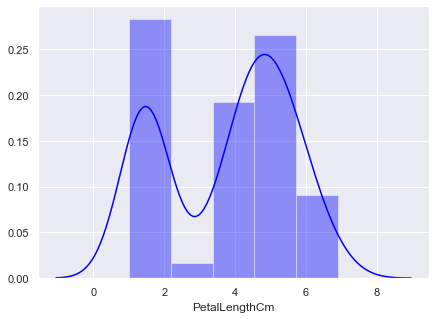

In [29]:
sns.distplot(Iris_Dataset["PetalLengthCm"],color="blue")
sns.set(rc={'figure.figsize':(7,5)})

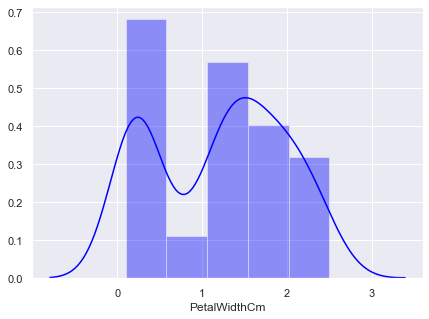

In [30]:
sns.distplot(Iris_Dataset["PetalWidthCm"],color="blue")
sns.set(rc={'figure.figsize':(7,5)})

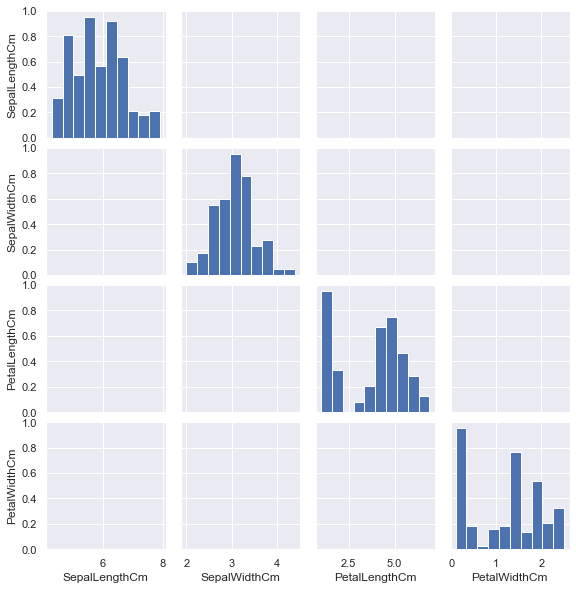

In [64]:
#TO CHECK PSIRWISE RELATIONSHIPS IN DATASET 
sns.pairplot(Iris_Dataset,height=2, kind= 'kde')

In [51]:
#TO CHECK CORELATION
Iris_Dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


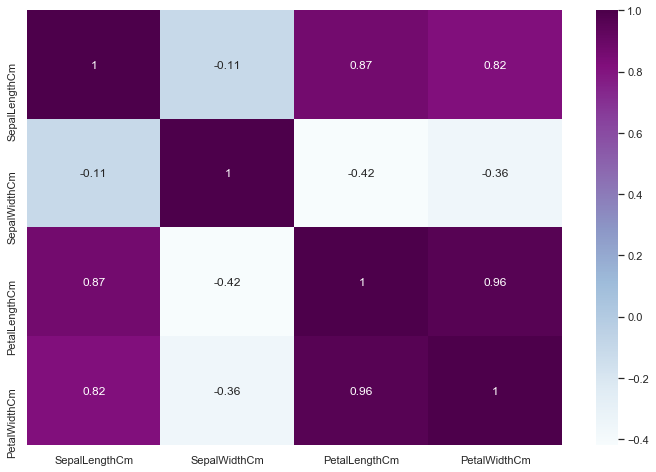

In [53]:
#CORRELATION MATRIX 
plt.figure(figsize=(12,8))
sns.heatmap(Iris_Dataset.corr(),annot=True,cmap="BuPu")

### Using the elbow method to find the optimal number of clusters

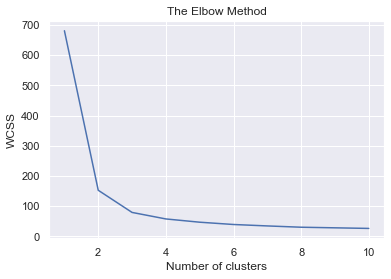

In [57]:
#TO FIND OPTIMAL NUMBER OF CLUSTERS FOR K MEANS CLUSTRING 
x=Iris_Dataset.iloc[:,:-1].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Above we can see that elbow has occured where the number of clusters is 3.

In [59]:
# APPLYING KMEANS TO THE DATASET 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


In [60]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualize the test set result


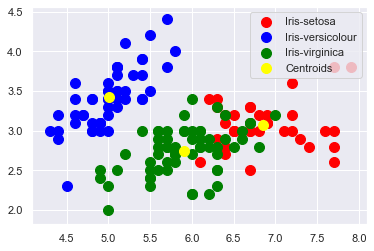

In [61]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

#PLOTTING THE CENTROIDS OF THE CLUSTERS 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
